In [48]:
import pandas as pd
import importlib.util
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# import train_predict from your file (change file name/path; omit suffix, i.e. .py)
m = importlib.import_module('testing1')

train_predict = m.__dict__['train_predict']

# load data
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")

# split data (note: we use a different test set for grading purposes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# train and predict with function from student
y_pred = train_predict(X_train, y_train, X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy: {}".format(acc))

KeyError: 'train_predict'

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [59]:
# 读取数据集
data = pd.read_csv("lasso_data.csv")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2, random_state=42)

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 1.0049948070299084


In [55]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [56]:
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Lasso Regression Mean Squared Error: 1.0211713123548256


In [57]:
print("Linear Regression Coefficients:", lr.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)

Linear Regression Coefficients: [ 3.00700480e+00  1.00230149e+00 -1.41773998e-04  1.00230149e+00
 -2.00176072e+00 -8.04155251e-04]
Lasso Regression Coefficients: [ 2.90718160e+00  1.97957910e+00 -0.00000000e+00  6.82176723e-05
 -1.99779349e+00 -0.00000000e+00]


In [63]:
# 在测试集上进行预测
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [64]:
# 评估模型性能
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso): ", mse_lasso)

Mean Squared Error (Lasso):  1.009956660837883


In [65]:
print("Mean Squared Error (Linear Regression): ", mse)
print("Mean Squared Error (Lasso Regression): ", mse_lasso)

# 比较模型性能
if mse < mse_lasso:
    print("Linear Regression has a better performance.")
else:
    print("Lasso Regression has a better performance.")

Mean Squared Error (Linear Regression):  1.0049948070299084
Mean Squared Error (Lasso Regression):  1.009956660837883
Linear Regression has a better performance.


In [66]:
# 输出模型系数
print("Linear Regression Coefficients: ", lin_reg.coef_)
print("Lasso Regression Coefficients: ", lasso.coef_)

Linear Regression Coefficients:  [ 3.01013707e+00  1.00222946e+00 -2.25319940e-04  1.00222946e+00
 -2.00117801e+00  1.48623551e-03]
Lasso Regression Coefficients:  [ 2.95738021e+00  1.99211797e+00 -1.88897256e-06  7.21987802e-05
 -1.99978697e+00 -0.00000000e+00]


In [45]:
# imports here
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


# define additional functions here
def preprocess(X):
    # Normalize pixel values
    X = X / 255.
    # Reshape to 44x48x3 images
    X = X.values.reshape(-1, 44, 48, 3)
    return X


def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# define train_predict function
def train_predict(X_train, y_train, X_test):
    # check that the input has the correct shape
    assert X_train.shape == (len(X_train), 6336)
    assert y_train.shape == (len(y_train), 1)
    assert X_test.shape == (len(X_test), 6336)

    # Preprocess data
    X_train = preprocess(X_train)
    X_test = preprocess(X_test)

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42)

    # Define model
    input_shape = X_train[0].shape
    num_classes = len(np.unique(y_train))
    model = create_model(input_shape, num_classes)

    # Train model
    model.fit(X_train, y_train, epochs=10, batch_size=32,
              validation_data=(X_val, y_val))

    # Evaluate model on validation set
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print("Validation accuracy:", val_acc)

    # Make predictions on test set
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)

    # test that the returned prediction has correct shape
    assert y_pred.shape == (len(X_test),) or y_pred.shape == (len(X_test), 1)

    return y_pred


if __name__ == "__main__":
    # load data
    X_train = pd.read_csv("X_train.csv")
    y_train = pd.read_csv("y_train.csv")

    # execute train_predict function
    y_pred = train_predict(X_train, y_train, X_test)

    # save predictions to file (change path if necessary)
    np.savetxt("y_pred.csv", y_pred, delimiter=",")


AssertionError: 

In [29]:
print(X_test.shape)

(6000, 6)


In [33]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load the data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Step 3: Preprocess the data
X_train = X_train / 255.0  # normalize pixel values
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 4: Define the machine learning model
model = LogisticRegression(random_state=42)

# Step 5: Train the machine learning model
model.fit(X_train, y_train.values.ravel())

# Step 6: Evaluate the machine learning model
y_pred_val = model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy on validation set: {accuracy_val*100:.2f}%")

# Step 7: Make predictions on the test data
X_test = pd.read_csv

Accuracy on validation set: 86.25%


/Users/bryantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# 2. (2 points) Split the data into a train and a test set with appropriate test size.

# 导入pandas库和sklearn库中的train_test_split函数
# Import the pandas library and the train_test_split function from the sklearn library.
import pandas as pd
from sklearn.model_selection import train_test_split

# 通过pandas库的read_csv函数读取名为"lasso_data.csv"的数据集，并将其存储为名为df的数据框。
# Use the read_csv function from the pandas library to read the dataset "lasso_data.csv" and store it as a dataframe named df.
df = pd.read_csv("lasso_data.csv")

# 从数据框df中获取独立变量（自变量）X和因变量（标签）y。X是df中除最后一列之外的所有列，而y是df中最后一列。
# Get the independent variables (features) X and the dependent variable (label) y from the dataframe df. X is all columns in df except the last one, and y is the last column in df.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 使用train_test_split函数将X和y数据集拆分为训练集和测试集。参数test_size=0.2表示将20%的数据分配到测试集中，而random_state=42表示将随机种子设为42以确保结果的可重复性。拆分后的数据存储在X_train、X_test、y_train和y_test四个变量中。
# Use the train_test_split function to split the X and y datasets into training and testing sets. The parameter test_size=0.2 means that 20% of the data will be assigned to the testing set, while random_state=42 means that the random seed is set to 42 to ensure the reproducibility of the results. The split data is stored in four variables named X_train, X_test, y_train, and y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
df = pd.read_csv("lasso_data.csv")

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

print("Linear Regression Coefficients: ", lin_reg.coef_)
print("Lasso Regression Coefficients: ", lasso.coef_)

Linear Regression Mean Squared Error: 1.003028082406663
Lasso Regression Mean Squared Error: 1.0064068476712646
Linear Regression Coefficients:  [ 3.01013707e+00  1.00222946e+00 -2.25319940e-04  1.00222946e+00
 -2.00117801e+00  1.48623551e-03]
Lasso Regression Coefficients:  [ 2.96064005e+00  1.99202716e+00 -9.37475558e-05  9.11652548e-07
 -1.99919828e+00  0.00000000e+00]


Linear Regression MSE: 1.00
Lasso Regression (alpha=0.01) MSE: 1.01
Lasso Regression (alpha=0.1) MSE: 1.02
Lasso Regression (alpha=1) MSE: 2.29
Lasso Regression (alpha=10) MSE: 29.32


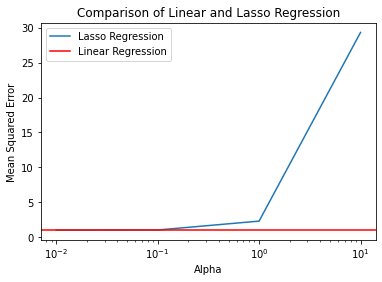

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('lasso_data.csv')

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse_lr:.2f}")

alphas = [0.01, 0.1, 1, 10]
lasso_models = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha).fit(X_train, y_train)
    lasso_models.append(lasso_model)

mse_lasso = []

for i in range(len(alphas)):
    y_pred = lasso_models[i].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_lasso.append(mse)
    print(f"Lasso Regression (alpha={alphas[i]}) MSE: {mse:.2f}")

plt.plot(alphas, mse_lasso, label="Lasso Regression")
plt.axhline(y=mse_lr, color='r', linestyle='-', label="Linear Regression")
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Linear and Lasso Regression')
plt.legend()
plt.show()    
    